In [1]:
%%capture
import tensorflow as tf
from tensorflow import keras
from scipy.io import loadmat
from tensorflow.keras import regularizers
import os
import time
from IPython.display import HTML, display
! pip install tabulate
import tabulate
import numpy as np
import shutil
import gc
from tensorflow.keras.models import model_from_json
from scipy.io import savemat
!pip install tqdm
!pip install h5py
import zipfile
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from sklearn.metrics import r2_score
from sklearn import preprocessing
from tensorflow.keras.models import model_from_json

Please change the below path to point to where the folder "Capstone_Data" is saved

In [2]:
path_to_folder = "/home/pk2573/Capstone_Data"

In [3]:
def scale(x):
    """
    Scales the input data by subtracting the mean and dividing by the standard deviation 
    
    Inputs: x: a n-dimensional tensor
    
    Returns: a n-dimensional tensor of same shape as x
    """

    return (x - np.mean(x)) / np.std(x)

In [4]:
def preprocess(x):
    """
    Cuts the input 75% along the z-axis to remove laminar layers
    
    Inputs: x: a 3-dimensional tensor
    
    Returns: a 3-dimensional tensor of shape (length, width, 75% * height)
    """
    
    return x[:,:,:int(0.75*x.shape[2])]

In [5]:
os.chdir(os.path.dirname(path_to_folder))

## 1. Load Model

In [6]:
json_file = open('combined_coarses_model_tau.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_base = model_from_json(loaded_model_json)
model_base.load_weights("combined_coarses_model_tau.h5")
model_base.compile(optimizer = tf.train.AdamOptimizer(), loss = {"tau_12": "mse", 
                                                                 "tau_13": 'mse', 
                                                                 "tau_23": "mse"})

In [7]:
model_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 7, 7, 7, 3)   0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 1029)         0           data[0][0]                       
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          131840      flatten[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128)          0           dense[0][0]                      
__________________________________________________________________________________________________
dense_1 (D

## 2. Prepare Data Directories

In [8]:
subdirs = [subdir for subdir, dirs, files in os.walk(path_to_folder)]
try:
    subdirs.remove(path_to_folder + "/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re1243Fr20/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re1243Fr20/coarse4/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re1243Fr20/coarse8/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re1243Fr20/coarse16/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re1243Fr20/coarse16/.ipynb.mat")
    subdirs.remove(path_to_folder + "/Re1243Fr20/coarse24/.ipynb.mat")
    subdirs.remove(path_to_folder + "/Re546/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re546/coarse4/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re546/coarse8/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re546/coarse16/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re546/coarse24/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re554Fr5/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re554Fr5/coarse4/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re554Fr5/coarse16/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re554Fr5/coarse24/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re309Fr2/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re309Fr2/coarse8/.ipynb.mat")
    subdirs.remove(path_to_folder + "/Re309Fr2/coarse4/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re309Fr2/coarse16/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re309Fr2/coarse24/.ipynb_checkpoints")
    subdirs.remove(path_to_folder + "/Re309Fr2/coarse16/.ipynb.mat")
    subdirs.remove(path_to_folder + "/Re309Fr2/coarse24/.ipynb.mat")
    subdirs.remove(path_to_folder + "/Re546")
    subdirs.remove(path_to_folder + "/Re554Fr5")
    subdirs.remove(path_to_folder + "/Re1243Fr20")
    subdirs.remove(path_to_folder + "/Re309Fr2")

except:
    pass

subdirs = sorted(subdirs[1:])
subdirs

['/home/pk2573/Capstone_Data/Re1243Fr20/coarse16',
 '/home/pk2573/Capstone_Data/Re1243Fr20/coarse24',
 '/home/pk2573/Capstone_Data/Re1243Fr20/coarse4',
 '/home/pk2573/Capstone_Data/Re1243Fr20/coarse8',
 '/home/pk2573/Capstone_Data/Re309Fr2/coarse16',
 '/home/pk2573/Capstone_Data/Re309Fr2/coarse24',
 '/home/pk2573/Capstone_Data/Re309Fr2/coarse4',
 '/home/pk2573/Capstone_Data/Re309Fr2/coarse8',
 '/home/pk2573/Capstone_Data/Re546/coarse16',
 '/home/pk2573/Capstone_Data/Re546/coarse24',
 '/home/pk2573/Capstone_Data/Re546/coarse4',
 '/home/pk2573/Capstone_Data/Re546/coarse8',
 '/home/pk2573/Capstone_Data/Re554Fr5/coarse16',
 '/home/pk2573/Capstone_Data/Re554Fr5/coarse24',
 '/home/pk2573/Capstone_Data/Re554Fr5/coarse4',
 '/home/pk2573/Capstone_Data/Re554Fr5/coarse8']

## 3. Make Predictions


Timestep: 1
Running Re1243Fr20_coarse16
Running Re1243Fr20_coarse24
Running Re1243Fr20_coarse4
Running Re1243Fr20_coarse8
Running Re309Fr2_coarse16
Running Re309Fr2_coarse24
Running Re309Fr2_coarse4
Running Re309Fr2_coarse8
Running Re546_coarse16
Running Re546_coarse24
Running Re546_coarse4
Running Re546_coarse8
Running Re554Fr5_coarse16
Running Re554Fr5_coarse24
Running Re554Fr5_coarse4
Running Re554Fr5_coarse8

Timestep: 2
Running Re1243Fr20_coarse16
Running Re1243Fr20_coarse24
Running Re1243Fr20_coarse8
Running Re309Fr2_coarse8


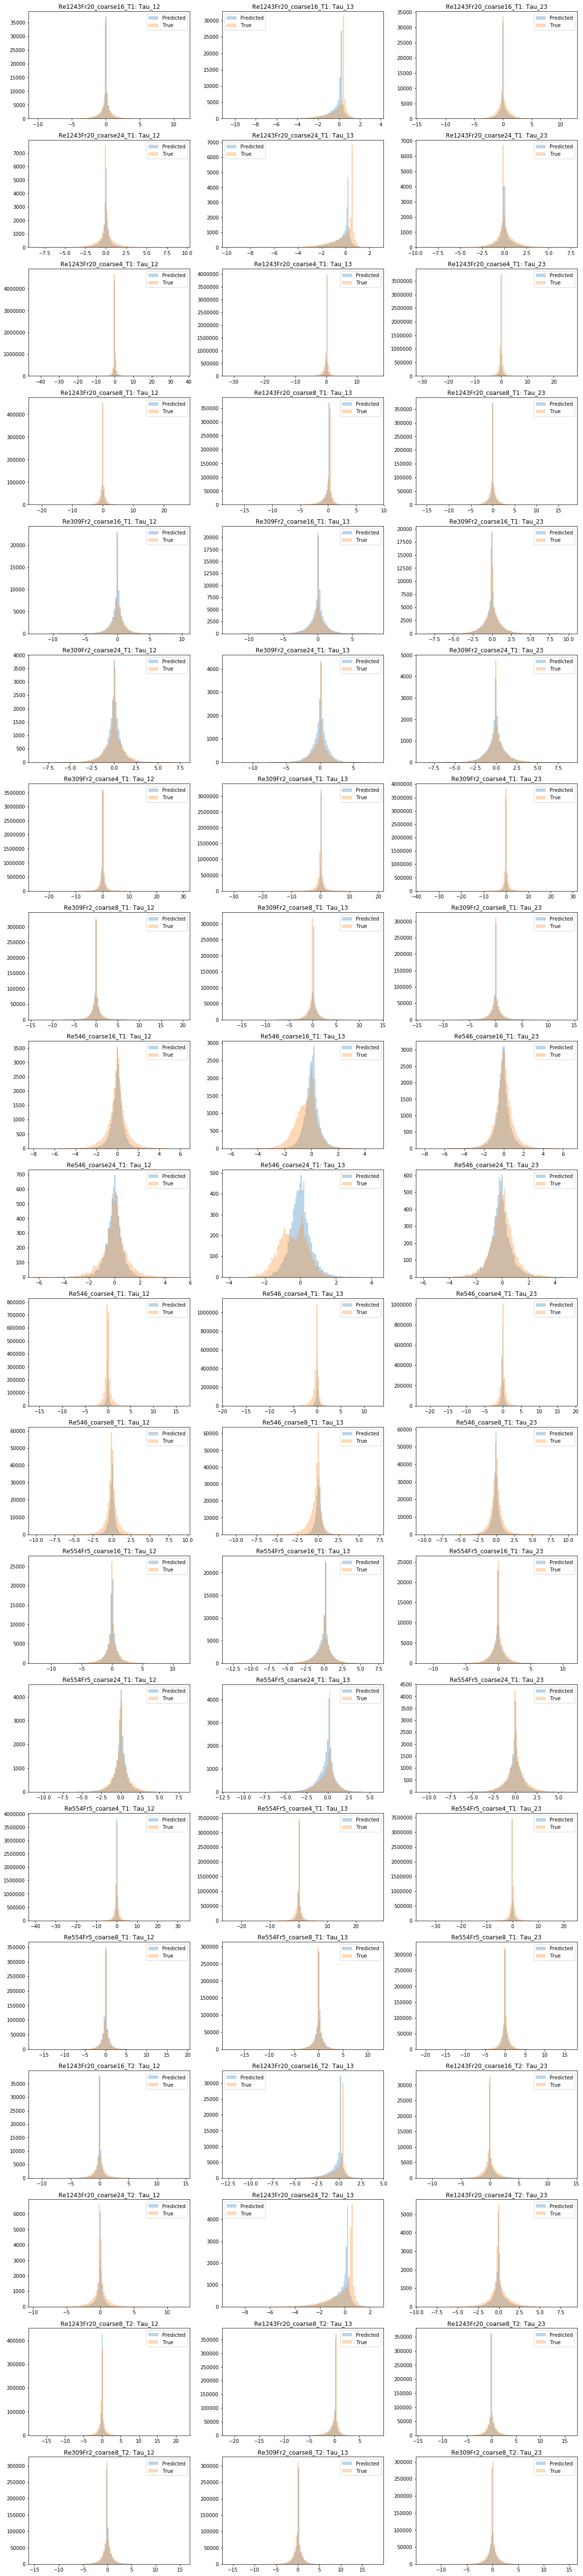

In [9]:
out_tau = [["Data Source", "Tau_12", "Tau_13", "Tau_23"]]

os.mkdir(os.path.dirname(path_to_folder) + "/Taus")
count = 1
num_files = 25
fig = plt.figure(figsize = (20, 192))
for m in [1,2]:
    print("\nTimestep:", str(m))
    for path in subdirs:
        counter = 1
        check = False
        os.chdir(path)
        
        try:
            # Load data
            u = loadmat('u_F_xyz_T' + str(m) + '.mat')
            u = preprocess(scale(u[list(u.keys())[-1]]))
            v = loadmat('v_F_xyz_T' + str(m) + '.mat')
            v = preprocess(scale(v[list(v.keys())[-1]]))
            w = loadmat('w_F_xyz_T' + str(m) + '.mat')
            w = preprocess(scale(w[list(w.keys())[-1]]))
            tau_12 = loadmat('tau12_F_xyz_T' + str(m) + '.mat')
            tau_12 = preprocess(scale(tau_12[list(tau_12.keys())[-1]]))
            tau_13 = loadmat('tau13_F_xyz_T' + str(m) + '.mat')
            tau_13 = preprocess(scale(tau_13[list(tau_13.keys())[-1]]))
            tau_23 = loadmat('tau23_F_xyz_T' + str(m) + '.mat')
            tau_23 = preprocess(scale(tau_23[list(tau_23.keys())[-1]]))
            y_tau_12 = []
            y_tau_13 = []
            y_tau_23 = []

            print("Running " + path.split("/")[-2] + "_" + path.split("/")[-1])

            x = np.array([u, v, w])
            x = np.transpose(x, [1, 2, 3, 0])
            x = np.pad(x, ((3,3), (3,3), (3,3), (0,0)), 'constant', constant_values = 0)

            del u
            del v
            del w
            gc.collect()

            if path.split("/")[-1] == "coarse4":
                if not os.path.exists(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1]):
                    os.mkdir(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1])
                    os.mkdir(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1] + "/Data")
                    os.mkdir(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1] + "/Labels")
                else:
                    shutil.rmtree(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1])
                    os.mkdir(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1])
                    os.mkdir(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1] + "/Data")
                    os.mkdir(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1] + "/Labels")

            # Generate randomized set of boxes
            sample = []
            size = 3
            for i in range(size, x.shape[0] - size):
                for j in range(size, x.shape[1] - size):
                    for k in range(size, x.shape[2] - size):
                        sample.append(x[i - size: i + size + 1, j - size: j + size + 1, k - size: k + size + 1, :])
                        y_tau_12.append(tau_12[i - size][j - size][k - size])
                        y_tau_13.append(tau_13[i - size][j - size][k - size])
                        y_tau_23.append(tau_23[i - size][j - size][k - size])
                        if path.split("/")[-1] == "coarse4" and len(sample) == int(((x.shape[0] - size * 2) * (x.shape[1] - size * 2) * (x.shape[2] - size * 2)) / num_files):
                            os.chdir(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1] + "/Data")
                            np.save(str(counter), np.array(sample))
                            os.chdir(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1] + "/Labels")
                            np.save(str(counter), np.array([y_tau_12, y_tau_13, y_tau_23]))

                            del sample
                            del y_tau_13
                            del y_tau_12
                            del y_tau_23
                            gc.collect()
                            sample = []
                            y_tau_23 = []
                            y_tau_12 = []
                            y_tau_13 = []

                            counter += 1

            x = np.array(sample)

            tau_12 = np.array(y_tau_12)
            tau_13 = np.array(y_tau_13)
            tau_23 = np.array(y_tau_23)

            y_true = [tau_12, tau_13, tau_23]

            del sample
            del tau_12
            del tau_13
            del tau_23
            gc.collect()

            taus = ["Tau_12", "Tau_13", "Tau_23"]
            corrs = []

            # Make predictions
            y_pred = model_base.predict(x)

            if path.split("/")[-1] == "coarse4":
                y_pred = [[],[],[]]
                y_true = [[],[],[]]
                for i in range(1, num_files + 1):
                    x = np.load(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1] + "/Data/" + str(i) + ".npy")
                    y_true[0].append(np.load(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1] + "/Labels/" + str(i) + ".npy")[0])
                    y_true[1].append(np.load(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1] + "/Labels/" + str(i) + ".npy")[1])
                    y_true[2].append(np.load(os.path.dirname(path_to_folder) + "/Data_" + path.split("/")[-1] + "/Labels/" + str(i) + ".npy")[2])

                    temp_1 = model_base.predict(x)

                    y_pred[0].append(temp_1[0])
                    y_pred[1].append(temp_1[1])
                    y_pred[2].append(temp_1[2])

                for i in range(len(y_pred)):
                    y_true[i] = np.concatenate(y_true[i], axis = 0)
                    y_pred[i] = np.concatenate(y_pred[i], axis = 0)

            for j in range(len(y_pred)):
                corrs.append(np.corrcoef(y_pred[j].flatten(), y_true[j])[0, 1])

                # Plot histogram of actual vs. predicted taus / heat
                fig.add_subplot((len(subdirs) + 4) * 2, 3, count)
                n_bins = 100
                plt.hist(y_pred[j].flatten(), bins = n_bins, alpha = 0.3, label = "Predicted")
                plt.hist(y_true[j], bins = n_bins, alpha = 0.3, label = "True")
                plt.title(path.split("/")[-2] + "_" + path.split("/")[-1] + str("_T" + str(m)) + ": " + taus[j])
                plt.legend()
                plt.show

                os.chdir(os.path.dirname(path_to_folder) + "/Taus")
                savemat(str(path.split("/")[-2] + "_" + path.split("/")[-1] + "_T" + str(m) + "_" + taus[j]), {'tau': y_pred[j].flatten()})

                count += 1

            out_tau.append([path.split("/")[-2] + "_" + path.split("/")[-1] + "_T" + str(m), str(np.round(corrs[0], 4)), str(np.round(corrs[1], 4)), str(np.round(corrs[2], 4))])

            del x
            del y_pred
            del y_true
            del taus
            gc.collect()

        except:
            pass
        
    out_tau.append(["", "", "", ""])

In [10]:
display(HTML(tabulate.tabulate(out_tau, tablefmt = 'html')))

Data Source,Tau_12,Tau_13,Tau_23
Re1243Fr20_coarse16_T1,0.7681,0.8226,0.7934
Re1243Fr20_coarse24_T1,0.7011,0.7855,0.7344
Re1243Fr20_coarse4_T1,0.9118,0.9105,0.9159
Re1243Fr20_coarse8_T1,0.842,0.8628,0.8617
Re309Fr2_coarse16_T1,0.5898,0.6992,0.7074
Re309Fr2_coarse24_T1,0.463,0.5993,0.6189
Re309Fr2_coarse4_T1,0.8578,0.8786,0.8763
Re309Fr2_coarse8_T1,0.7456,0.806,0.8031
Re546_coarse16_T1,0.4704,0.5523,0.4895
Re546_coarse24_T1,0.4353,0.5795,0.4376
